In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
# from sklearn.metrics import
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.nunique()

,0
age,47
sex,2
bmi,275
children,6
smoker,2
region,4
expenses,1337


In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
groupby_sex_smoker = df.groupby(['sex', 'smoker'])
groupby_sex_smoker.size()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64

<Axes: xlabel='children', ylabel='expenses'>

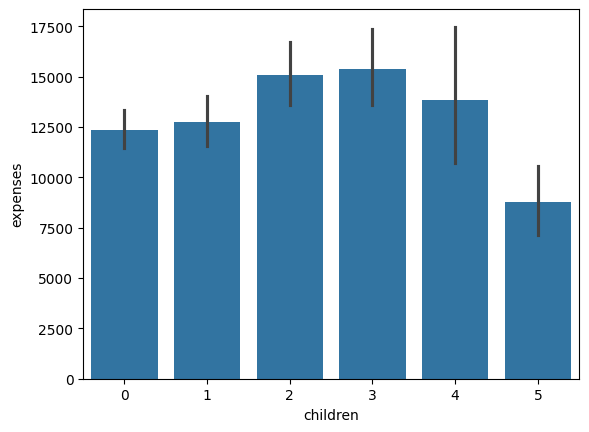

In [ ]:
sns.barplot(x='children', y='expenses', data=df)

<Axes: xlabel='smoker', ylabel='expenses'>

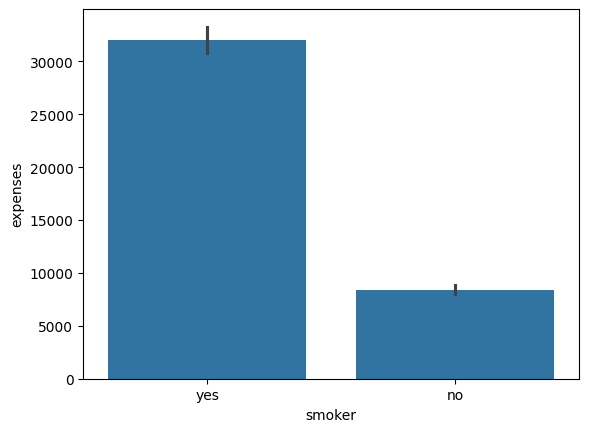

In [ ]:
sns.barplot(x='smoker', y='expenses', data=df)

<Axes: xlabel='region', ylabel='expenses'>

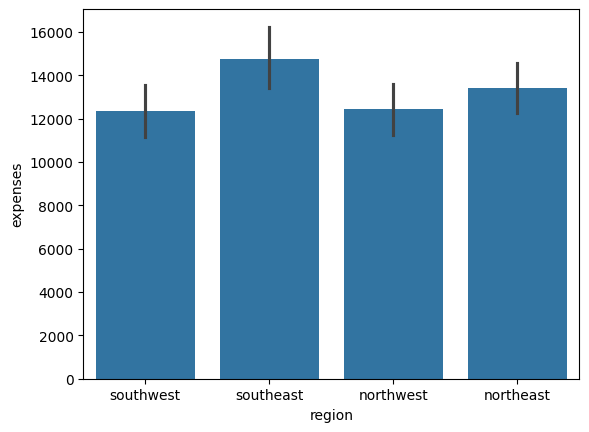

In [ ]:
sns.barplot(x='region', y='expenses', data=df)

<Axes: xlabel='sex', ylabel='expenses'>

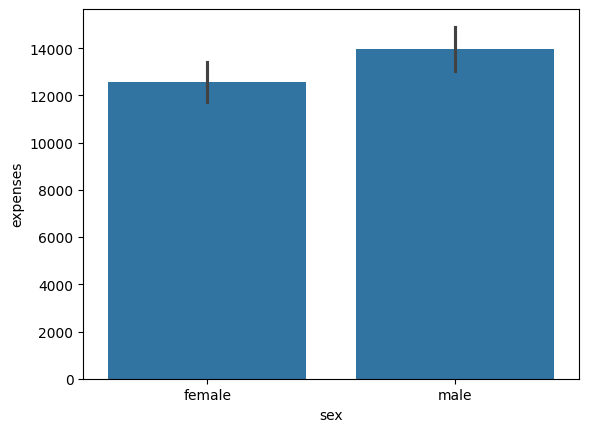

In [ ]:
sns.barplot(x='sex', y='expenses', data=df)

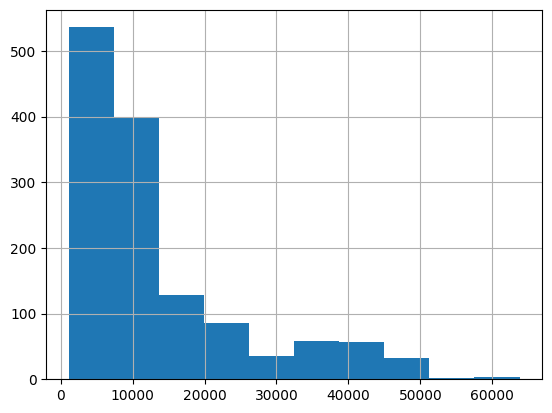

In [ ]:
df.expenses.hist()
plt.show()

In [ ]:
pie = df['region'].value_counts()
a = pie.index
b = pie.values
fig = px.pie(df, values=b, names=a)
fig.show()

<Axes: >

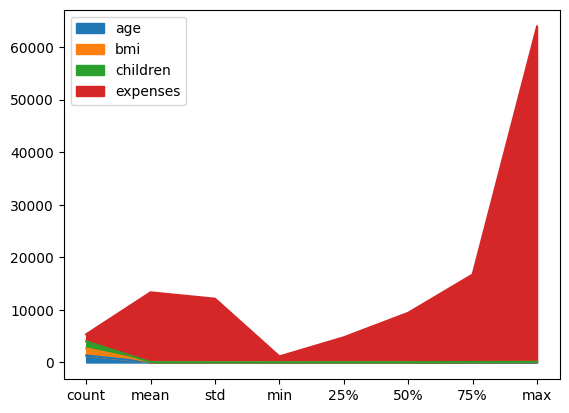

In [ ]:
df.describe().plot(kind='area')

<Axes: xlabel='expenses', ylabel='age'>

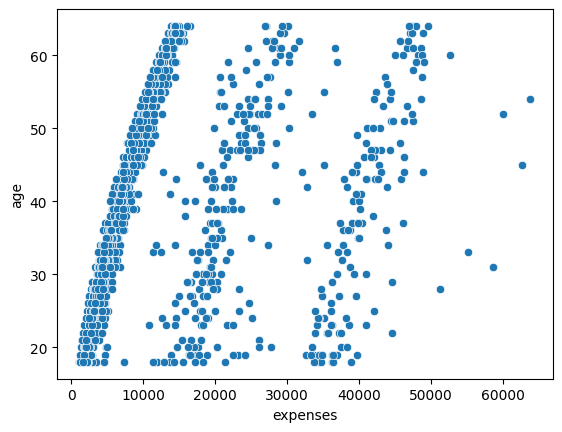

In [ ]:
sns.scatterplot(x='expenses', y='age', data=df, )

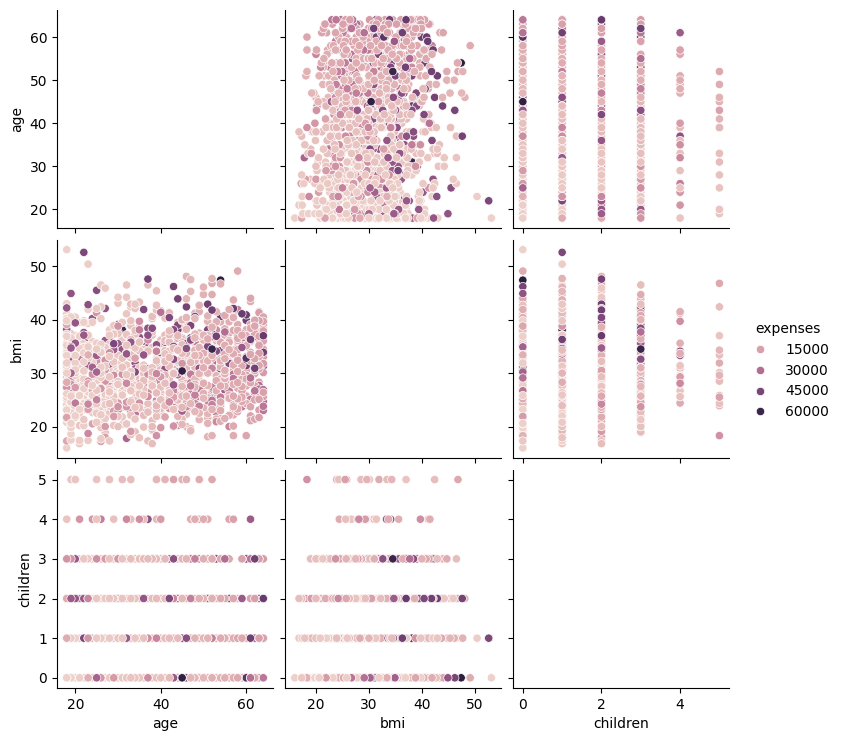

In [ ]:
sns.pairplot(df, hue='expenses')

<Axes: xlabel='bmi', ylabel='Count'>

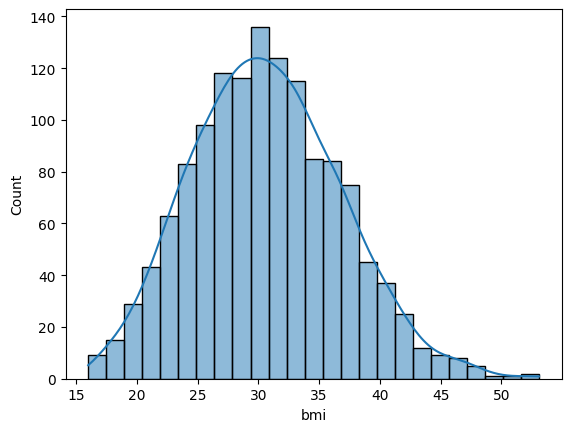

In [ ]:
sns.histplot(df['bmi'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

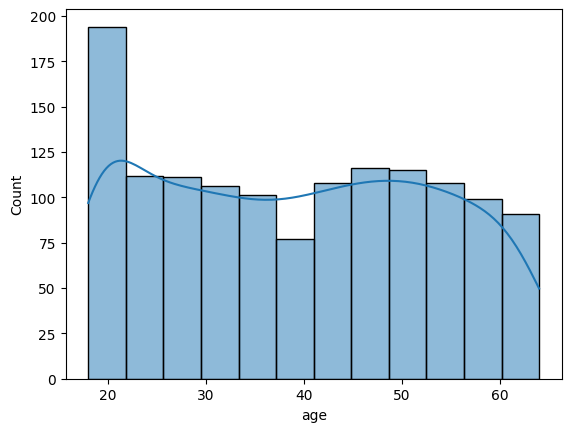

In [ ]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='expenses', ylabel='Count'>

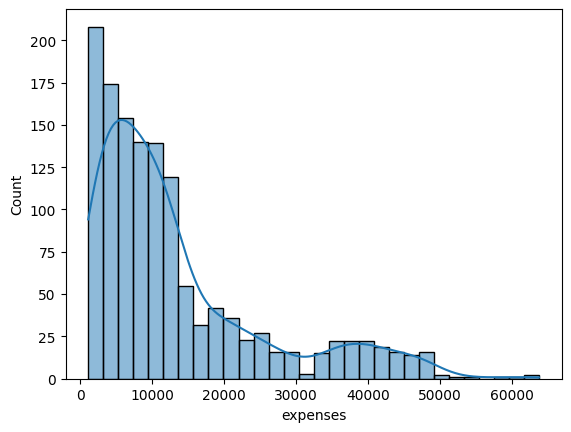

In [ ]:
sns.histplot(df['expenses'], kde=True)

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

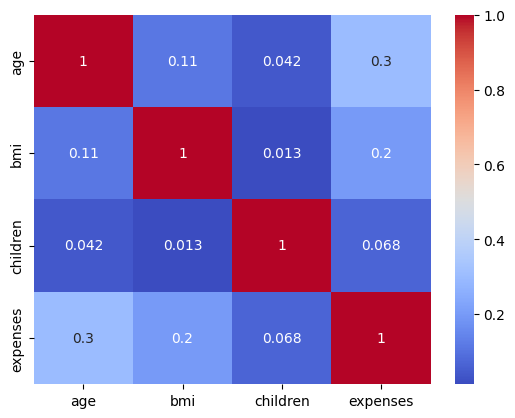

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
le = LabelEncoder()
df['region_label_encoded'] = le.fit_transform(df['region'])

In [ ]:
le = LabelEncoder()
df['gender_label_encoded'] = le.fit_transform(df['sex'])

In [ ]:
df['smoker_label_encoded'] = le.fit_transform(df['smoker'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,region_label_encoded,gender_label_encoded,smoker_label_encoded
0,19,female,27.9,0,yes,southwest,16884.92,3,0,1
1,18,male,33.8,1,no,southeast,1725.55,2,1,0
2,28,male,33.0,3,no,southeast,4449.46,2,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,0


In [ ]:
x = df[['age','bmi', 'children', 'gender_label_encoded', 'region_label_encoded', 'smoker_label_encoded']]
y = df['expenses']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model_linear = LinearRegression()

In [ ]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [ ]:
linear_score = model_linear.score(x_test, y_test)

In [ ]:
model_decision = DecisionTreeRegressor()
model_decision.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
decision_score = model_decision.score(x_test, y_test)

In [ ]:
model_random = RandomForestRegressor()
model_random.fit(x_train, y_train)
# model_random.score(x_test, y_test)
random_score = model_random.score(x_test, y_test)

In [ ]:
model_gradient = GradientBoostingRegressor()
model_gradient.fit(x_train, y_train)
gradient_score = model_gradient.score(x_test, y_test)

In [ ]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train, y_train)
xgb_score = model_xgb.score(x_test, y_test)

In [ ]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)
knn_score = model_knn.score(x_test, y_test)

In [ ]:
print("Linear Regressor: ",linear_score)
print("Decision Tree: ",decision_score)
print("Random Forest: ",random_score)
print("Gradient Boosting: ",gradient_score)
print("XGBoost: ",xgb_score)
print("K-Nearest Neighbors: ",knn_score)

Linear Regressor:  0.7833214205203848
Decision Tree:  0.7483287558493468
Random Forest:  0.8642882137783603
Gradient Boosting:  0.8753159542728997
XGBoost:  0.8401719783266387
K-Nearest Neighbors:  0.14879291416348772


In [ ]:
models = {
    'Linear Regression': model_linear,
    'Decision Tree': model_decision,
    'Random Forest': model_random,
    'Gradient Boosting': model_gradient,
    'XGBoost': model_xgb,
    'K-Nearest Neighbors': KNeighborsRegressor()
}
model_names = []
r2_scores = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    model_names.append(name)
    r2_scores.append(r2)
    print(f"{name}\n\tMean Square Error: {mse},\n\tR2 Score: {r2},\n\tPercentage: {r2*100:.2f} %,\n\tSquare Mean Square Error: {rmse:.2f}\n")

Linear Regression
	Mean Square Error: 33639075.08997807,
	R2 Score: 0.7833214205203848,
	Percentage: 78.33 %,
	Square Mean Square Error: 5799.92

Decision Tree
	Mean Square Error: 41563192.85100261,
	R2 Score: 0.7322799880346408,
	Percentage: 73.23 %,
	Square Mean Square Error: 6446.95

Random Forest
	Mean Square Error: 20893672.83482926,
	R2 Score: 0.8654180788903022,
	Percentage: 86.54 %,
	Square Mean Square Error: 4570.96

Gradient Boosting
	Mean Square Error: 19361412.32951473,
	R2 Score: 0.8752877922755903,
	Percentage: 87.53 %,
	Square Mean Square Error: 4400.16

XGBoost
	Mean Square Error: 24813097.97888283,
	R2 Score: 0.8401719783266387,
	Percentage: 84.02 %,
	Square Mean Square Error: 4981.27

K-Nearest Neighbors
	Mean Square Error: 132148822.21557885,
	R2 Score: 0.14879291416348772,
	Percentage: 14.88 %,
	Square Mean Square Error: 11495.60



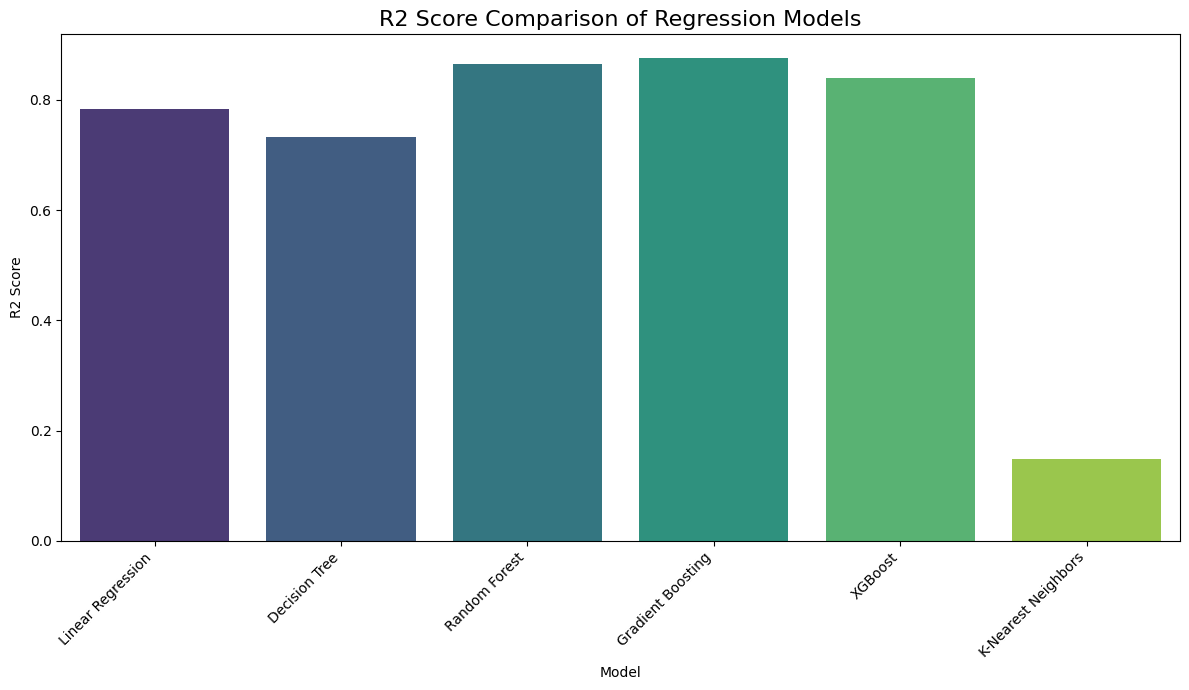

In [ ]:
plt.figure(figsize=(12, 7))
colors = sns.color_palette('viridis', len(model_names))
sns.barplot(x=model_names, y=r2_scores, palette=colors)
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.title("R2 Score Comparison of Regression Models", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

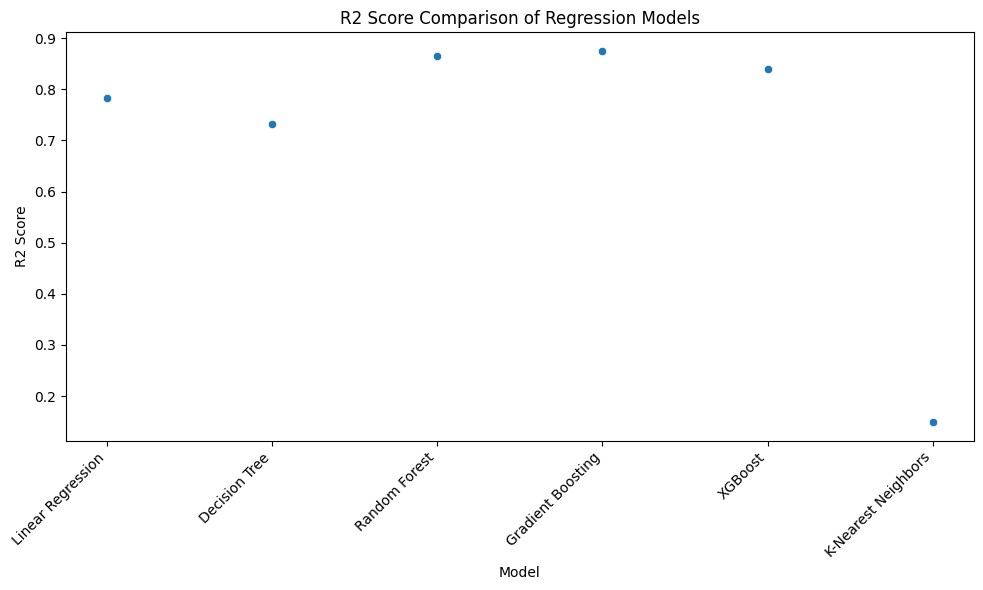

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_names, y=r2_scores)
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.title("R2 Score Comparison of Regression Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# import pickle
# filename = 'insurance_model.pkl'
# pickle.dump(model_gradient, open(filename, 'wb'))